<br>
<img style="float: left"; src="img\bip.jpeg" width="60">
<br>
<br>
<br>
<br>

# Day 3 - Exploratory Data Analysis

# Content:
[1. Introduction](#1)  <br>
[2. Descriptive Statistical Summary](#2)  <br>
[3. Measures of Central Tendency](#3)  <br>
[4. Measures of Spread](#4)  <br>
[5. Measures of Shape](#5)  <br>
[6. Measures of Relationship](#6)  <br>
[7. Outliers](#7)  <br>
[8. Discretization](#8)  <br>
[9. How to create a pivot table](#9)  <br>
[10. How to group data](#10)  <br>

<a id='1'></a>
# 1. Introduction

**Exploratory Data Analysis** is the preliminary exploration of the data aimed at identifying their most relevant characteristics. Knowing your data is essential to perform any analysis. Data Exploration consist of two main aspects:
* **Statistical Analysis**: to measure or understand data to solve problem.
* **Data Visualization**: graphical representation of the results

Today we focus on Statistical Analysis using the dataset that we prepared last lesson (Day 2 - Data Preparation)

## The Dataset: _Credit Card Clients Dataset_

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content
There are 25 variables:

- ID: ID of each client

- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

- SEX: Gender (1=male, 2=female)

- EDUCATION: (0=unknown, 1=graduate school, 2=university, 3=high school, 4=others)

- MARRIAGE: Marital status (unknown, married, single, others)

- AGE: Age in years

- PAY_0: Repayment status in September, 2005 (-2=no consumption, -1=paid in full,0=paid the minimum due amount, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- PAY_2: Repayment status in August, 2005 (scale same as above)

- PAY_3: Repayment status in July, 2005 (scale same as above)

- PAY_4: Repayment status in June, 2005 (scale same as above)

- PAY_5: Repayment status in May, 2005 (scale same as above)

- PAY_6: Repayment status in April, 2005 (scale same as above)

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

- default: Default payment (1=yes, 0=no)

In [1]:
# first of all we need to import the necessary libraries
from data.support import *
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the csv file (clean version)
df = pd.read_csv("data/UCI_Credit_Card_clean.csv")
df.head(10)

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000.00,2,2,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000.00,2,2,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000.00,2,2,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000.00,2,2,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000.00,1,2,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000.00,1,1,single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000.00,1,1,single,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000.00,2,2,single,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000.00,2,3,married,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,167509.66,1,3,single,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


<a id='2'></a>
# 2. Descriptive Statistical Summary
A basic concept in statistics and programming is a ***variable***, which describes a *characteristic of an object*. There are mainly two types of variables:
* **Categorical Variables**
* **Numerical Variables**

What are the **categorical** variables in the dataset?

In [3]:
# List of categorical variables names
categorical=['id','sex','education','marriage','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','default']
len(categorical)

11

**Note**: Most of the categorical variables have already been converted to numerical. We know that these variables logically represent categories, but Pandas treats them like all other numerical variables.

What are the **numerical** variables in the dataset?

In [4]:
# List of numerical variables names
numerical=['limit_bal','age','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
len(numerical)

14

In Pandas the function `info()` returns a concise summary of a DataFrame.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [5]:
# Show DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         30000 non-null  int64  
 1   limit_bal  30000 non-null  float64
 2   sex        30000 non-null  int64  
 3   education  30000 non-null  int64  
 4   marriage   30000 non-null  object 
 5   age        30000 non-null  int64  
 6   pay_0      30000 non-null  int64  
 7   pay_2      30000 non-null  int64  
 8   pay_3      30000 non-null  int64  
 9   pay_4      30000 non-null  int64  
 10  pay_5      30000 non-null  int64  
 11  pay_6      30000 non-null  int64  
 12  bill_amt1  30000 non-null  int64  
 13  bill_amt2  30000 non-null  int64  
 14  bill_amt3  30000 non-null  int64  
 15  bill_amt4  30000 non-null  int64  
 16  bill_amt5  30000 non-null  int64  
 17  bill_amt6  30000 non-null  int64  
 18  pay_amt1   30000 non-null  int64  
 19  pay_amt2   30000 non-null  int64  
 20  pay_am

In Pandas, the function `describe()` returns descriptive statistic summary of all the variables.

For **numeric data**, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For **object data** (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

In [6]:
# Describe all columns of DataFrame
df.describe(include='all')

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167509.662440,1.603733,1.796267,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129700.126922,0.489129,0.733242,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


### Exercise 1
We known that `sex` variable is categorical and the numbers are only factors that stand each for a specific level of the variable. Transform numeric data into object data, using *lambda* function.

- sex: 
    1=male
    2=female
    
*(5 min)*

In [7]:
# Write here your code
df["sex"] = [{1.0:"male",2.0:"female"}.get(x) for x in df["sex"]]

Here is an alternative way to transform numeric data into object:

**Remember**: we can check counts of unique values of a variable using `value_counts()` method

In [8]:
# Counts how many times each value of a variable appears
df["sex"].value_counts()

female    18112
male      11888
Name: sex, dtype: int64

In [9]:
#pass normalize=True argument to return the relative frequencies of unique values
df["sex"].value_counts(normalize=True)

female    0.603733
male      0.396267
Name: sex, dtype: float64

### Exercise 2

Get descriptive statistics of `sex` and `marriage` variables

*(2 min)*

In [10]:
# Write your code here
df.sex.describe()
df.marriage.describe()


count      30000
unique         4
top       single
freq       15964
Name: marriage, dtype: object

We focus on the statistics of **numerical variables**

In [11]:
#select numerical variables
df_num=df.loc[:,numerical].copy()
df_num

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,20000.0,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000.0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000.0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000.0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000.0,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000.0,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000.0,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000.0,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [12]:
#get descriptive statistic summary 
df_num.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167509.662440,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129700.126922,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [13]:
#transposed version
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167509.662440,129700.126922,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
bill_amt1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_amt2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_amt3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_amt4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_amt5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_amt6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
pay_amt1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
pay_amt2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


Now we get into details of statistical measures that can be very useful.

<a id='3'></a>
# 3. Measures of Central Tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. They are sometimes called measures of central location or statistical profiling. There are 5 main measures:
* Mean
* Meadian
* Mode

### Mean
The **mean** is the average of all values of a series of number.

$$\mu = \frac {\sum_{i=1}^n X_i}{n}$$

In Pandas, the mean can be calculated with the function `mean()`

In [14]:
# Compute the mean
df_num.mean()

limit_bal    167509.662440
age              35.485500
bill_amt1     51223.330900
bill_amt2     49179.075167
bill_amt3     47013.154800
bill_amt4     43262.948967
bill_amt5     40311.400967
bill_amt6     38871.760400
pay_amt1       5663.580500
pay_amt2       5921.163500
pay_amt3       5225.681500
pay_amt4       4826.076867
pay_amt5       4799.387633
pay_amt6       5215.502567
dtype: float64

### Median

The **median** is the middle score for a set of data that has been arranged in order of magnitude. 

In Pandas, the median can be calculated with the function `median()`

In [15]:
# Compute the median
df_num.median()

limit_bal    140000.0
age              34.0
bill_amt1     22381.5
bill_amt2     21200.0
bill_amt3     20088.5
bill_amt4     19052.0
bill_amt5     18104.5
bill_amt6     17071.0
pay_amt1       2100.0
pay_amt2       2009.0
pay_amt3       1800.0
pay_amt4       1500.0
pay_amt5       1500.0
pay_amt6       1500.0
dtype: float64

### Mode

The **mode** is the value that appears most often.

In Pandas, the mode can be calculated with the function `mode()`

In [16]:
# Compute the mode
df_num.mode()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,50000.0,29,0,0,0,0,0,0,0,0,0,0,0,0


<a id='4'></a>
# 4. Measures of Spread

Another extremely useful information is the amount of "variability" of our features, which can be expressed through several **measures of spread** or dispersion.
* Interquartile Range (IQR)
* Variance
* Standard Deviation


### Percentile
Given a set of observations, the **$p^{th}$ percentile** indicates the value below which $p\%$ of the observations in the set fall.

In Pandas, the $p^{th}$ percentile can be calculated with the function `quantile(p/100)`

In [17]:
# Compute the 40-th percentile
df_num.quantile(0.40)

limit_bal    100000.0
age              31.0
bill_amt1     13469.2
bill_amt2     12799.6
bill_amt3     12197.2
bill_amt4     11145.0
bill_amt5      9809.2
bill_amt6      8770.2
pay_amt1       1724.0
pay_amt2       1600.0
pay_amt3       1206.0
pay_amt4       1000.0
pay_amt5       1000.0
pay_amt6       1000.0
Name: 0.4, dtype: float64

### Quartiles
A **quartiles** divide the data into four groups, each with (approximately) a quarter of all observations. In other words, Quartiles are the three *cut points* (***percentile*** or *quantile*) that divides a dataset into four equal-sized groups or ranges.

<img src="img\Percentile_and_Quantile.png" width="400">

Remember, it is necessary to specify values between $[0<x<1]$; to return the *first quartiles* (*Q1*) and *third quartiles* (*Q3*) is necessary to  set respectively `0.25` or `0.75`, as second argument.

In [18]:
# Compute first and third quartiles
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
print('Quartile 1: ', '\n', Q1, '\n')
print('Quartile 3: ', '\n', Q3, '\n')

Quartile 1:  
 limit_bal    50000.00
age             28.00
bill_amt1     3558.75
bill_amt2     2984.75
bill_amt3     2666.25
bill_amt4     2326.75
bill_amt5     1763.00
bill_amt6     1256.00
pay_amt1      1000.00
pay_amt2       833.00
pay_amt3       390.00
pay_amt4       296.00
pay_amt5       252.50
pay_amt6       117.75
Name: 0.25, dtype: float64 

Quartile 3:  
 limit_bal    240000.00
age              41.00
bill_amt1     67091.00
bill_amt2     64006.25
bill_amt3     60164.75
bill_amt4     54506.00
bill_amt5     50190.50
bill_amt6     49198.25
pay_amt1       5006.00
pay_amt2       5000.00
pay_amt3       4505.00
pay_amt4       4013.25
pay_amt5       4031.50
pay_amt6       4000.00
Name: 0.75, dtype: float64 



### Interquartile Range
The **Interquartile Range** (***IQR***) is the difference between the $3^{rd}$ quartile and the $1^{st}$ quartile; the IQR is the range that include the central 50% of the data and is less sensitive to extreme values (*outliers*).

<img src="img\Percentile_and_Quantile.png" width="400">

$$IQR = Q3- Q1$$

### Exercise 3
Compute IQR of `age` variable

*(2 min)*

In [19]:

sol = df_num.age.quantile(0.75) - df_num.age.quantile(0.25)

In [20]:
check_3_3(sol)

'Correct answer!'

### Variance 
**Variance** is the ***average of the squared deviation from the mean***, which represents the distance between the sample average.

In Pandas, the variance can be calculated with the function `var()`

In [21]:
# Compute the variance
df_num.var()

limit_bal    1.682212e+10
age          8.496976e+01
bill_amt1    5.422240e+09
bill_amt2    5.065705e+09
bill_amt3    4.809338e+09
bill_amt4    4.138716e+09
bill_amt5    3.696294e+09
bill_amt6    3.546692e+09
pay_amt1     2.743423e+08
pay_amt2     5.308817e+08
pay_amt3     3.100051e+08
pay_amt4     2.454286e+08
pay_amt5     2.334266e+08
pay_amt6     3.160383e+08
dtype: float64

### Standard Deviation
A more natural measure of the dispersion of a sample population is the **standard deviation**, which is the ***square root of variance*** and it *measures how spread out data point are*.

In Pandas, the standard deviation can be calculated with the function `std()`

In [22]:
# Compute the standard deviation
df_num.std()

limit_bal    129700.126922
age               9.217904
bill_amt1     73635.860576
bill_amt2     71173.768783
bill_amt3     69349.387427
bill_amt4     64332.856134
bill_amt5     60797.155770
bill_amt6     59554.107537
pay_amt1      16563.280354
pay_amt2      23040.870402
pay_amt3      17606.961470
pay_amt4      15666.159744
pay_amt5      15278.305679
pay_amt6      17777.465775
dtype: float64

<a id='5'></a>
# 5. Measures of Shape

Another extremely useful information is the shape of the probability distribution of our features, which can analysed by mesuring the *skewness* and *kurtosis* of a probability distribution.

### Skewness
**Skewness** occurs when there is a lack of symmetry in a normal or probability ditribution. Skewness can be quantified to *define the extent to which a distribution differs from a normal distribution*.

<img src="img\Skewness.jpg" width="400">


* If a distribution skewed to the *right*, it is ***positively skewed***.
* If a distribution skewed to the *left*, it is ***negatively skewed***.

In Pandas, the skewness can be calculated with the function `skew()`

In [23]:
# Compute the skewness
df_num.skew()

limit_bal     0.992957
age           0.732246
bill_amt1     2.663861
bill_amt2     2.705221
bill_amt3     3.087830
bill_amt4     2.821965
bill_amt5     2.876380
bill_amt6     2.846645
pay_amt1     14.668364
pay_amt2     30.453817
pay_amt3     17.216635
pay_amt4     12.904985
pay_amt5     11.127417
pay_amt6     10.640727
dtype: float64

### Kurtosis
**Kurtosis** is a descriptor of the shape of a probability distribution and describes the width of the tails of the distribution in relation to the tails of a normal distribution; is a measure of the "tailedness" of the probability distribution. 

<img src="img\Kurtosis.jpg" width="400">

A distribution with high kurtosis presents less extreme observations than a normal distribution.

In Pandas, the Kurtosis can be calculated with the function `kurtosis()`

In [24]:
# Compute the kurtosis
df_num.kurtosis()

limit_bal       0.538320
age             0.044303
bill_amt1       9.806289
bill_amt2      10.302946
bill_amt3      19.783255
bill_amt4      11.309325
bill_amt5      12.305881
bill_amt6      12.270705
pay_amt1      415.254743
pay_amt2     1641.631911
pay_amt3      564.311229
pay_amt4      277.333768
pay_amt5      180.063940
pay_amt6      167.161430
dtype: float64

<a id='6'></a>
# 6. Measures of Relationship

One of primary interest in data analysis is usually the *relationships between variables*. ***Correlation*** and ***covariance*** measure the strength and direction of a linear relationship between two numerical variables.

### Covariance
Covariance is essentially the average of products of deviations from means:

$$Covar(X,Y) = \frac {\sum_{i=1}^n (X_i-\mu_X)(Y_i-\mu_Y)}{n-1}$$

In Pandas, the covariance can be computed with the function `cov()`.

In [25]:
# Compute the covariance
df_num.cov()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
limit_bal,1.682212e+10,172888.823751,2.724388e+09,2.567644e+09,2.546147e+09,2.451695e+09,2.329524e+09,2.242003e+09,4.194392e+08,5.331867e+08,4.800387e+08,4.130920e+08,4.304382e+08,5.063247e+08
age,1.728888e+05,84.969755,3.817293e+04,3.561366e+04,3.433425e+04,3.045311e+04,2.765407e+04,2.613765e+04,3.992042e+03,4.626862e+03,4.746824e+03,3.087324e+03,3.218052e+03,3.191904e+03
bill_amt1,2.724388e+09,38172.933546,5.422240e+09,4.986670e+09,4.556511e+09,4.075286e+09,3.714795e+09,3.519876e+09,1.710894e+08,1.685692e+08,2.034048e+08,1.826164e+08,1.879091e+08,2.347681e+08
bill_amt2,2.567644e+09,35613.657962,4.986670e+09,5.065705e+09,4.582086e+09,4.086508e+09,3.720401e+09,3.524868e+09,3.305146e+08,1.653859e+08,1.888731e+08,1.643518e+08,1.717652e+08,2.204845e+08
bill_amt3,2.546147e+09,34334.251320,4.556511e+09,4.582086e+09,4.809338e+09,4.122238e+09,3.726780e+09,3.524247e+09,2.806565e+08,5.064226e+08,1.587478e+08,1.558003e+08,1.904126e+08,2.247817e+08
bill_amt4,2.451695e+09,30453.108180,4.075286e+09,4.086508e+09,4.122238e+09,4.138716e+09,3.677105e+09,3.451762e+09,2.482888e+08,3.076686e+08,3.398374e+08,1.312133e+08,1.576892e+08,2.031590e+08
bill_amt5,2.329524e+09,27654.067800,3.714795e+09,3.720401e+09,3.726780e+09,3.677105e+09,3.696294e+09,3.425914e+09,2.185501e+08,2.538936e+08,2.700805e+08,2.791830e+08,1.315051e+08,1.774537e+08
bill_amt6,2.242003e+09,26137.648547,3.519876e+09,3.524868e+09,3.524247e+09,3.451762e+09,3.425914e+09,3.546692e+09,1.972478e+08,2.369244e+08,2.451233e+08,2.334670e+08,2.799982e+08,1.222761e+08
pay_amt1,4.194392e+08,3992.041735,1.710894e+08,3.305146e+08,2.806565e+08,2.482888e+08,2.185501e+08,1.972478e+08,2.743423e+08,1.089849e+08,7.354626e+07,5.178189e+07,3.756893e+07,5.469033e+07
pay_amt2,5.331867e+08,4626.861549,1.685692e+08,1.653859e+08,5.064226e+08,3.076686e+08,2.538936e+08,2.369244e+08,1.089849e+08,5.308817e+08,9.929841e+07,6.501168e+07,6.368414e+07,6.456816e+07


### Correlation

**Correlation** is a unitless quantity that is unaffected by the measurement scale. The **correlation coefficient** is a statistical measure of the *degree to which changes to the value of one variable predict change to the value of another*.

$$Corr(X,Y)= \frac{Covar(X,Y)}{Stdev(X) \cdot Stdev(Y)}$$

<img src="img\Correlation_coefficient.png" width="750">

In Pandas, the correlation can be computed with the function `corr()`.

In [26]:
df_num.corr()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
limit_bal,1.000000,0.144609,0.285259,0.278147,0.283074,0.293828,0.295422,0.290258,0.195246,0.178419,0.210209,0.203303,0.217218,0.219593
age,0.144609,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
bill_amt1,0.285259,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
bill_amt2,0.278147,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
bill_amt3,0.283074,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
bill_amt4,0.293828,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
bill_amt5,0.295422,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
bill_amt6,0.290258,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
pay_amt1,0.195246,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
pay_amt2,0.178419,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


The correlation matrix of $n$ random variables $X_1,...,X_n$ is the $n \times n$ matrix whose $(i,j)$ entry is defined by $corr(X_i, X_j)$.

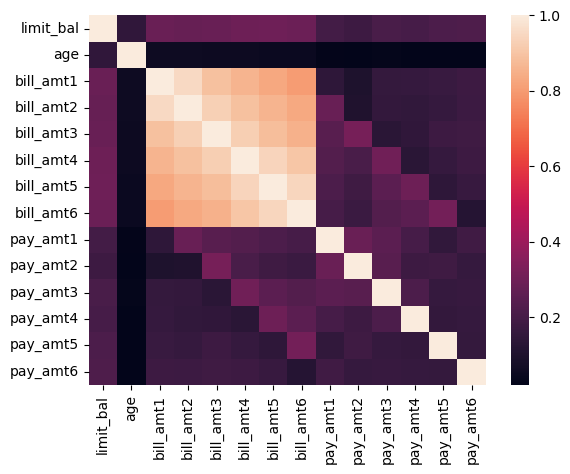

In [27]:
plt.figure()
sns.heatmap(df_num.corr());

<a id='7'></a>
# 7. Outliers
In statistics, an outlier is an observation point that is distant from other observations, which lies outside the overall distribution of the dataset. Statistically, an outliers is:
* Data point that falls outside of 1.5 times of the IQR above the 3rd quartile and below the 1st quartile
* Data point that falls outside of 3 standard deviations
* Data point whose z score is greater than 3

When dealing with outliers, it is best to run the analyses two ways: *with the outliers* and *without them*. The presence of an outlier involve higher variability within a population and the impact of an outlier has serveral consequences, which leads to experimental measurement errors. In addition, outliers can cause some issues for statistical analyiss such as
* Skew the data (***skewness***)
* Significant *impact on* ***mean***
* Significant *impact on* ***standard deviation***.


### Finding Outliers
To ease the discovery of outliers, we have plenty of methods in statistics and there are three main techniques for identifing outliers:
* **Scatter plots**
* **Interquartile range (IQR)** or **Boxplots** 
$$x < Q1 - 1.5 \cdot IQR$$
$$x > Q3 + 1.5 \cdot IQR$$
* **Z score**
$$Z_{score} = \frac{(Observation — Mean)}{Standard \space Deviation}$$

$$z = \frac{X — \mu}{\sigma}$$

### Z-Score
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

Calculating the Z-score permits to re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. 

In [28]:
# Calculating Z-score using scipy.stats package
z = stats.zscore(df_num)
z

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,-1.137332,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.366310,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597617,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.906025,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.906025,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404712,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.135003,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.060230,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674719,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In the previous section, we saw how one can detect the outlier using Z-score but now we want to remove or filter the outliers and get the clean data. This can be done with just one line code as we have already calculated the Z-score.

In [29]:
# Setting Threshold
threshold = 3

# Removing outliers
df_num_cleaned = df_num[(np.abs(z) < threshold).all(axis=1)]
print("With Outliers:", df_num.shape,
      "\nWithout Outliers", df_num_cleaned.shape)

With Outliers: (30000, 14) 
Without Outliers (27076, 14)


<a id='8'></a>
# 8. Discretization (cut/qcut)

Sometimes it is useful to convert a numerical column into a categorical one, perhaps to make it better suited for a machine learning model, or just for better analyzing the data.

For example, we could categorize clients on the basis of *age* (young, middle, senior)

Use `pd.cut()` when you need to segment and sort data values into **bins**. Bins are intervals in which values are divided. To understand this concept, let's start with histograms

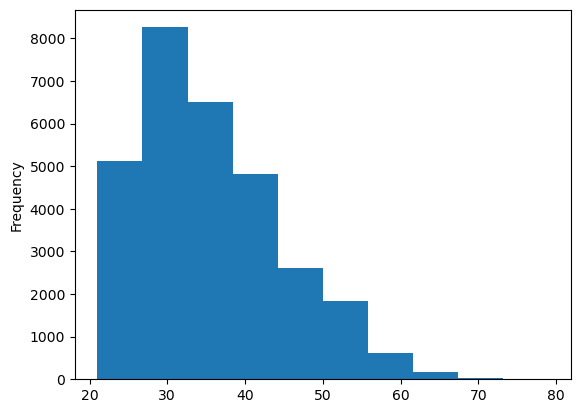

In [30]:
# Plot histogram of age
df['age'].plot.hist();

Histograms automatically divide an array or list of numbers into several bins, each containing different number of observations. **All bins have equal size**, i.e. the width of the intervals is the same. It is possible to control the number of bins, but not the size of bins

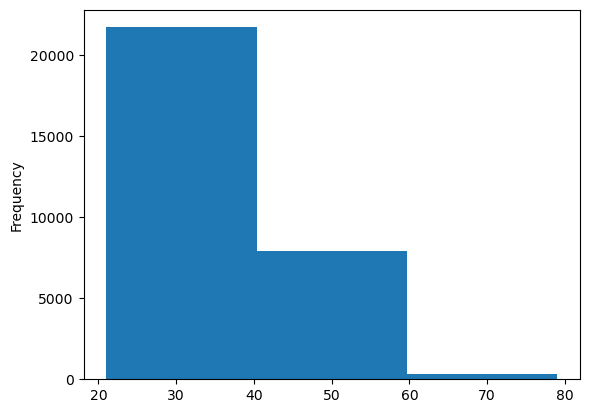

In [31]:
# Plot histogram of age with 3 bins
df['age'].plot.hist(bins=3);

By default, `cut` divides the distribution into bins that have equal size

In [32]:
# Binning of age column
cut_age=pd.cut(df['age'],bins=3)
cut_age.value_counts()

(20.942, 40.333]    21726
(40.333, 59.667]     7935
(59.667, 79.0]        339
Name: age, dtype: int64

In [33]:
# Set bin labels
cut_age=pd.cut(df['age'], bins=3, labels = ["young","middle","senior"])
cut_age.value_counts()

young     21726
middle     7935
senior      339
Name: age, dtype: int64

You can define **bin edges** manually by passing in a list

In [34]:
# Define intervals manually:
#1. young: (20, 35]
#2. middle: (35, 55]
#3. senior: (55, 79]
cut_age_edges=pd.cut(df['age'], bins=[20,35,55,79], labels = ["young","middle","senior"])
cut_age_edges.value_counts()

young     16809
middle    12347
senior      844
Name: age, dtype: int64

In [35]:
# Save binnes values into a new column
df['age_group']=cut_age_edges
#test age group
df[['age_group','age']].loc[df.age==55].head()

,age_group,age
129,middle,55
308,middle,55
328,middle,55
434,middle,55
837,middle,55


`pd.qcut()` divides the data into bins based on quantiles rather than constructing each bin with numeric edges

In [36]:
#q is the number of quantiles
qcut_age=pd.qcut(df['age'], q=3)
qcut_age.value_counts()

(20.999, 30.0]    11013
(30.0, 39.0]       9843
(39.0, 79.0]       9144
Name: age, dtype: int64

In [37]:
#use q=4 for quartile-based discretization
qcut_age=pd.qcut(df['age'], q=4)
qcut_age.value_counts()

(20.999, 28.0]    8013
(28.0, 34.0]      7683
(41.0, 79.0]      7450
(34.0, 41.0]      6854
Name: age, dtype: int64

In [38]:
# Set bin labels
qcut_age=pd.qcut(df['age'], q=3,labels = ["young","middle","senior"])
qcut_age.value_counts()

young     11013
middle     9843
senior     9144
Name: age, dtype: int64

### Exercise 4
Categorize clients on the basis of limit balance: bronze , silver , gold. Use quantile-based discretization. Call the new column 'credit_lev'.

*(2 min)*

In [39]:
# Write your code here
df['credit_lev'] = pd.qcut(df["limit_bal"], q=3, labels = ["bronze","silver","gold"])
df["credit_lev"].value_counts()

bronze    10789
gold       9619
silver     9592
Name: credit_lev, dtype: int64

<a id='9'></a>
# 9. How to create a pivot table

Let's add a column `pay_avg`: this represents the average number of payment default months by customer

Observations:

1. Score of maximum -1 shows that the customer, on average, pays on time.
2. Positive values shows the average number of payment default months by customer. 

In [40]:
# Create pay_avg column
df['pay_avg'] = (df.pay_0 + df.pay_2 + df.pay_3 + df.pay_4 + df.pay_5 + df.pay_6) / 6

In [41]:
#on average, customers pay the minimum amount, with no payment default months delays
df['pay_avg'].describe()

count    30000.000000
mean        -0.182439
std          0.982176
min         -2.000000
25%         -0.833333
50%          0.000000
75%          0.000000
max          6.000000
Name: pay_avg, dtype: float64

Starting from a DataFrame we can also create a pivot table. A pivot table is a table of statistics that summarizes the data of a more extensive table. This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.

For example, let's suppose we are interested in understanding how the monthly average of payments varies based on the level of the credit obtained, the sex and the age class of the customer.

In [42]:
#aggfunc is mean by default
avg_pay_sex_age = pd.pivot_table(df, values='pay_avg', index=['sex', 'age_group'], columns=['credit_lev'], aggfunc='mean')
avg_pay_sex_age

credit_lev          bronze    silver      gold
sex    age_group                              
female young      0.189945 -0.279615 -0.521308
       middle     0.172556 -0.364360 -0.664506
       senior     0.314922 -0.333333 -0.817109
male   young      0.231268 -0.132429 -0.459209
       middle     0.269231 -0.127155 -0.562630
       senior     0.301541 -0.095652 -0.573951

Here pandas create for us a table indexed by 2 columns: sex, and age_group. We can access data using them as keys:

In [43]:
avg_pay_sex_age.loc['male']

credit_lev,bronze,silver,gold
age_group,,,
young,0.231268,-0.132429,-0.459209
middle,0.269231,-0.127155,-0.562630
senior,0.301541,-0.095652,-0.573951


In [44]:
avg_pay_sex_age.loc['male','middle']

credit_lev
bronze    0.269231
silver   -0.127155
gold     -0.562630
Name: (male, middle), dtype: float64

If you also want to index a specific column with .loc, you must use a tuple like this:

In [45]:
avg_pay_sex_age.loc[('male', 'middle'), 'silver']

-0.1271546899485113

You can slice with a ‘range’ of values, by providing a slice of tuples.

In [46]:
avg_pay_sex_age.loc[('male','middle'):('female','young')]

,credit_lev,bronze,silver,gold
sex,age_group,,,


Passing a list of labels or tuples works similar to reindexing (notice the double square brackets):

In [47]:
avg_pay_sex_age.loc[[('male','middle'), ('female','young')]]

,credit_lev,bronze,silver,gold
sex,age_group,,,
male,middle,0.269231,-0.127155,-0.562630
female,young,0.189945,-0.279615,-0.521308


<a id='10'></a>
# 10. How to group data

Beside the Pivot Table, we can aggregate our DataFrame using groupby operation. Thanks to this function, we group data according to one or more columns values and then we apply a function (like sum, count, mean,...) to the resulting groups to calculate some interesting statistics for each group.

![alt text](img/groupBy1.png "")

Notice that the aggretation functions (like mean, median, sum) only work on quantitative columns, i.e. the columns that contain numbers (integer or float). These functions don't work on string or category variables, for which these statistics don't make sense. This is the reason for which columns like marriage, credit_lev, age_group are automatically excluded by the aggregation.

In [48]:
# we apply the sum function to three columns aggregated by sex
df.groupby('sex')[['age', 'limit_bal', 'pay_avg']].sum()

,age,limit_bal,pay_avg
sex,,,
female,630422,3.081009e+09,-4311.833333
male,434143,1.944281e+09,-1161.333333


In [49]:
# age group would be automatically excluded
df.groupby('sex')[['age_group', 'limit_bal', 'pay_avg']].sum()

,limit_bal,pay_avg
sex,,
female,3.081009e+09,-4311.833333
male,1.944281e+09,-1161.333333


In [50]:
# we apply the mean function to three columns aggregated by sex
df.groupby('sex')[['age', 'limit_bal', 'pay_avg']].mean()

,age,limit_bal,pay_avg
sex,,,
female,34.806868,170108.690717,-0.238065
male,36.519431,163549.904689,-0.097690


In [51]:
# we apply the median function to three columns aggregated by sex
df.groupby('sex')[['age', 'limit_bal', 'pay_avg']].median()

,age,limit_bal,pay_avg
sex,,,
female,33.0,150000.0,0.0
male,35.0,130000.0,0.0


In [52]:
# we can also apply different aggregation functions to different variables, by using agg() function
df.groupby('sex').agg({'age':'mean','pay_avg':'median'})

,age,pay_avg
sex,,
female,34.806868,0.0
male,36.519431,0.0


In [53]:
#We can also aggregate by more columns
df.groupby(['sex', 'age_group'])[['pay_avg']].mean()

pay_avg
sex    age_group          
female young     -0.184290
       middle    -0.321961
       senior    -0.193004
male   young     -0.057145
       middle    -0.144268
       senior    -0.103645

In [54]:
# we can also apply two functions on the same column 
df_multi_idx =df.groupby(['sex','age_group','credit_lev']).agg({'education':['nunique','unique']})
df_multi_idx

education                 
                              nunique           unique
sex    age_group credit_lev                           
female young     bronze             5  [2, 3, 1, 0, 4]
                 silver             5  [2, 3, 1, 4, 0]
                 gold               5  [1, 2, 3, 0, 4]
       middle    bronze             4     [2, 3, 1, 0]
                 silver             5  [3, 2, 0, 1, 4]
                 gold               5  [1, 2, 3, 0, 4]
       senior    bronze             4     [2, 1, 3, 0]
                 silver             4     [3, 2, 0, 1]
                 gold               5  [1, 2, 3, 4, 0]
male   young     bronze             5  [2, 1, 3, 0, 4]
                 silver             5  [3, 1, 2, 4, 0]
                 gold               5  [1, 2, 3, 0, 4]
       middle    bronze             4     [1, 3, 2, 0]
                 silver             5  [1, 2, 3, 4, 0]
                 gold               5  [1, 2, 3, 0, 4]
       senior    bronze             4     [2, 3, 1, 0]
                 silver             4     [1, 3, 2, 0]
                 gold               4     [1, 2, 0, 3]

Now our dataframe has Multi-Index columns. To fix this problem you can rename the columns or just drop one of the two levels

In [55]:
print(df_multi_idx.columns)

MultiIndex([('education', 'nunique'),
            ('education',  'unique')],
           )


In [56]:
df_multi_idx.columns = df_multi_idx.columns.droplevel(0)
df_multi_idx

nunique           unique
sex    age_group credit_lev                          
female young     bronze            5  [2, 3, 1, 0, 4]
                 silver            5  [2, 3, 1, 4, 0]
                 gold              5  [1, 2, 3, 0, 4]
       middle    bronze            4     [2, 3, 1, 0]
                 silver            5  [3, 2, 0, 1, 4]
                 gold              5  [1, 2, 3, 0, 4]
       senior    bronze            4     [2, 1, 3, 0]
                 silver            4     [3, 2, 0, 1]
                 gold              5  [1, 2, 3, 4, 0]
male   young     bronze            5  [2, 1, 3, 0, 4]
                 silver            5  [3, 1, 2, 4, 0]
                 gold              5  [1, 2, 3, 0, 4]
       middle    bronze            4     [1, 3, 2, 0]
                 silver            5  [1, 2, 3, 4, 0]
                 gold              5  [1, 2, 3, 0, 4]
       senior    bronze            4     [2, 3, 1, 0]
                 silver            4     [1, 3, 2, 0]
                 gold              4     [1, 2, 0, 3]

# Session completed
--------

### Exercise 5

Group the data by the variable sex and marriage and calculate the following kpis for each group:
- number of clients
- average and max value of age
- average and max value of limit_bal

Rename the columns by concatenating the two levels of the multi-index

*(15 min)*

In [73]:
# Write here your code
df.groupby(["sex","marriage"])[["age", "limit_bal","id"]].agg({"age":["mean","max"],"limit_bal":["mean","max"],"id":"count"})


age          limit_bal               id
                      mean max           mean        max count
sex    marriage                                               
female married   38.899870  75  176738.226312  1000000.0  8469
       others    42.369792  64  101614.583333   470000.0   192
       single    30.956646  70  165693.610415   780000.0  9411
       unknown   37.775000  56  134000.000000   300000.0    40
male   married   41.839114  79  191038.739491   800000.0  5190
       others    43.427481  65   92900.763359   500000.0   131
       single    32.165115  68  143262.659695   800000.0  6553
       unknown   37.928571  51  130000.000000   360000.0    14

### Exercise 6

Returns the **number of clients by gender** that satisfy the following conditions:
- the **limit_bal** have to be **over** the **80$^{th}$ percentile**
- the **pay_avg** have to be **under** the **mean** of this **subset** 
- the **age** have to be **under** the **first quantile** of the **initial dataset**

*(15 min)*

In [83]:
# Write here your code

n_male = df.loc[(df.limit_bal > df["limit_bal"].quantile(0.8)) & 
                (df.pay_avg < df.loc[df.limit_bal>df["limit_bal"].quantile(0.8)]["pay_avg"].mean()) & 
                (df.age < df["age"].quantile(0.25)) &
                (df.sex == "male")].shape[0]
n_female = df.loc[(df.limit_bal > df["limit_bal"].quantile(0.8)) & 
                (df.pay_avg < df.loc[df.limit_bal>df["limit_bal"].quantile(0.8)]["pay_avg"].mean()) & 
                (df.age < df["age"].quantile(0.25)) &
                (df.sex == "female")].shape[0]
n_male

33

In [84]:
check_3_6(n_male, n_female)

'Correct answer!'

### Exercise 7

Titanic Dataset is a well-known dataset used in Kaggle Competitions. It contains the details of the passengers on board of Titanic (891 to be exact) and it reveals whether they survived or not (*Survived* variable)

*(20 min)*

In [85]:
df_titanic=pd.read_csv("data/titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1.** Convert the numerical column **Age** into a categorical one. 

We want to create **3 categories** *(young, middle, senior)* and the critical years for the cut must be **25** and **40**.

In [90]:
# Write here your code

df_titanic["Age"] = pd.cut(df_titanic["Age"], bins = [0,25,40,81], labels = ["Young","Middle","Senior"])
df_titanic["Age"].value_counts()

Young     301
Middle    263
Senior    150
Name: Age, dtype: int64

**2.** Explore the **percentage of survivors** based on the following variables (Age, Pclass)

What is the combination of the 2 variables that has the **highest percentage of survivors**, taking into account that the subset must have a **size of at least 50 individuals**?


In [95]:
# Write here your code
df_titanic.groupby(["Age","Pclass"])[["Survived","PassengerId"]].agg({"Survived":"mean","PassengerId":"count"})
# Insert here the solutions
min_perc = ('middle', '3')
max_perc = ("middle", '1')

# Here an example
# min_perc = ('young', '3')
# max_perc = ('middle', '2')

In [96]:
check_3_7(min_perc, max_perc)

'Correct answer!'

In [97]:
df_titanic['Age'] = pd.cut(df_titanic['Age'], bins=[0,25,40,100], labels = ["young","middle","senior"])
    
grouped_titanic = df_titanic.groupby(['Age', 'Pclass']).agg({'Survived':['count', 'mean']})
grouped_titanic.columns = grouped_titanic.columns.droplevel(0)
grouped_titanic[grouped_titanic['count'] >= 50].sort_values('mean')

TypeError: '<' not supported between instances of 'int' and 'str'